In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: NVIDIA GeForce RTX 3080


### Payment DF

In [93]:
df_pay = pd.read_csv('payment.csv')

C:\Users\iHC\AppData\Local\Temp\ipykernel_34588\1371567900.py:1: DtypeWarning: Columns (8,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pay = pd.read_csv('payment.csv')


In [94]:
df_pay[df_pay['price'] == 0]['status'].value_counts()

status
False    1701
True      135
Name: count, dtype: int64

In [95]:
df_pay = df_pay[df_pay['status'] == True]

In [96]:
df_pay.shape

(103409, 17)

In [97]:
df_pay.head()

,_id,user_id,package_id,price,qrcode,transactionid,datetime,ref1,status,point,promotion,actual_time,sale_code_name,package_sub,action,subscription,sub_id
33,614d8724487220b1bc8ef02f,U6ddab545aff3f93f1645d0144c811364,credits,2.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521092415...,2021-09-24,8VJBZOII4HHSEBR833X0,True,128.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
35,614dc471487220b1bc8ef032,U27ec2d29f33e95bfa9fa36866718160d,package_50,50.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521092419...,2021-09-24,6IRZTZ3OJZ1AH3NT67E3,True,2500.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
40,614f0224487220b1bc8ef039,U3bdae9df091601f970a61ff8e5d5a72a,credits,1.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521092518...,2021-09-25,94ILSKL0HI9GY9SMHC9C,True,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
43,61524b3a7e08c711bcc763bb,U988ae1b48c47564ba834ceb84de5c54b,package_500,500.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521092805...,2021-09-28,D1SHKXZBINAMV7QN9AAQ,True,25000.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN
63,615a82df487220b1bc8ef061,U91ac72eed62590c7abf3ec66283d10b4,package_50,50.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521100411...,2021-10-04,EDHF1ZA3KBEKRWQ77II7,True,2500.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df_pay['price'] = df_pay['price'].astype(float)
df_pay['point'] = df_pay['point'].astype(float)

df_pay['datetime'] = pd.to_datetime(df_pay['datetime'], format='mixed')
df_pay['date'] = df_pay['datetime'].dt.date
df_pay['date'] = pd.to_datetime(df_pay['date'])

In [99]:
print(sorted(list(df_pay['price'].unique())))
print(list(df_pay['package_id'].unique()))
print(sorted(list(df_pay['point'].unique())))
print(sorted(list(df_pay['promotion'].unique())))
print(list(df_pay['subscription'].unique()))

[0.0, 1.0, 1.8, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0

In [100]:
df_pay = df_pay[['user_id', 'price', 'package_id', 'date', 'point', 'promotion', 'subscription']]

In [101]:
cols = ['package_id', 'subscription']

dummy = pd.get_dummies(df_pay[cols])

df_pay = pd.concat([df_pay, dummy], axis=1)

df_pay.drop(cols, axis=1, inplace=True)


In [102]:
df_pay = df_pay[df_pay['price'] >= 0]

In [103]:
df_pay.head()

,user_id,price,date,point,promotion,package_id_6400,package_id_Advanced,package_id_Basic,package_id_Compensate_basic,package_id_Free,...,package_id_package_800,subscription_Advanced,subscription_Basic,subscription_Compensate_basic,subscription_Free,subscription_Free trial,subscription_Mini,subscription_NoAds,subscription_Pro,subscription_Pro plus
33,U6ddab545aff3f93f1645d0144c811364,2.0,2021-09-24,128.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35,U27ec2d29f33e95bfa9fa36866718160d,50.0,2021-09-24,2500.0,100.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40,U3bdae9df091601f970a61ff8e5d5a72a,1.0,2021-09-25,26.0,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43,U988ae1b48c47564ba834ceb84de5c54b,500.0,2021-09-28,25000.0,5000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
63,U91ac72eed62590c7abf3ec66283d10b4,50.0,2021-10-04,2500.0,100.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
agg_dict = {
    'user_id': 'size',
    'price': 'sum',
    'date': 'max',
    'point': 'sum'
}

for col in df_pay.columns[3:]:
    if col.startswith('package_id'):
        agg_dict[col] = 'sum'
    elif col.startswith('subscription'):
        agg_dict[col] = 'max'

print(agg_dict)

{'user_id': 'size', 'price': 'sum', 'date': 'max', 'point': 'sum', 'package_id_6400': 'sum', 'package_id_Advanced': 'sum', 'package_id_Basic': 'sum', 'package_id_Compensate_basic': 'sum', 'package_id_Free': 'sum', 'package_id_Mini': 'sum', 'package_id_NoAds': 'sum', 'package_id_Pro': 'sum', 'package_id_Pro plus': 'sum', 'package_id_Unlimited': 'sum', 'package_id_credit': 'sum', 'package_id_credits': 'sum', 'package_id_mini': 'sum', 'package_id_pack_10000': 'sum', 'package_id_pack_1099': 'sum', 'package_id_pack_1299': 'sum', 'package_id_pack_13500': 'sum', 'package_id_pack_1699': 'sum', 'package_id_pack_179': 'sum', 'package_id_pack_2000': 'sum', 'package_id_pack_20000': 'sum', 'package_id_pack_2499': 'sum', 'package_id_pack_2500': 'sum', 'package_id_pack_299': 'sum', 'package_id_pack_499': 'sum', 'package_id_pack_5000': 'sum', 'package_id_pack_599': 'sum', 'package_id_pack_600': 'sum', 'package_id_pack_750': 'sum', 'package_id_pack_99': 'sum', 'package_id_package_100': 'sum', 'package_

In [105]:
df_pay = df_pay.groupby('user_id').agg(agg_dict)

In [106]:
df_pay = df_pay.rename(columns={
    'user_id': 'frequency',
    'price': 'monetary',
    'date': 'recency',
    'point': 'total_used_point'
})

In [107]:
df_pay.reset_index(inplace=True)

In [108]:
df_pay.dropna(inplace=True)

In [109]:
df_pay['recency'] = pd.to_datetime(df_pay['recency'])
df_pay['recency'] = (pd.Timestamp.now() - df_pay['recency']).dt.days

df_pay['recency_rev'] = 1 / df_pay['recency']

In [111]:
df_pay['frequency_percentile'] = df_pay['frequency'].rank(pct=True)
df_pay['monetary_percentile'] = df_pay['monetary'].rank(pct=True)
df_pay['recency_percentile'] = df_pay['recency_rev'].rank(pct=True)
df_pay['total_used_point_percentile'] = df_pay['total_used_point'].rank(pct=True)


df_pay['rfm_score'] = (
    0.3 * df_pay['frequency_percentile'] +
    0.2 * df_pay['monetary_percentile'] +
    0.3 * df_pay['recency_percentile'] +
    0.2 * df_pay['total_used_point_percentile']
)

In [112]:
df_pay.drop(['frequency_percentile', 'monetary_percentile', 'recency_percentile', 'recency_rev', 'frequency', 'monetary', 'recency', 'total_used_point', 'total_used_point_percentile'], axis=1, inplace=True)

In [113]:
df_pay.head()

,user_id,package_id_6400,package_id_Advanced,package_id_Basic,package_id_Compensate_basic,package_id_Free,package_id_Mini,package_id_NoAds,package_id_Pro,package_id_Pro plus,...,subscription_Advanced,subscription_Basic,subscription_Compensate_basic,subscription_Free,subscription_Free trial,subscription_Mini,subscription_NoAds,subscription_Pro,subscription_Pro plus,rfm_score
0,00MltnwtOLOxgDJb9ZMURoJ0Eb12,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.363154
1,00Y2l867uJhLP91cCR0pxnSRWb42,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.485967
2,00aeJQwil8MLeafNwWIcDG4dWsm2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.490970
3,00aklHmnRNV9ygxFwVM7JinQImX2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.455838
4,00juUkGAh2Ne3AnJPG2zAH0IeiE2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,0.340459


In [114]:
df_pay.shape

(42429, 52)

In [115]:
uid = set(df_pay['user_id'].values)

In [116]:
assert(df_pay['user_id'].nunique() == df_pay.shape[0])

### Msg DF

In [117]:
df_msg = pd.read_csv('message.csv')

C:\Users\iHC\AppData\Local\Temp\ipykernel_34588\2005193304.py:1: DtypeWarning: Columns (7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_msg = pd.read_csv('message.csv')


In [118]:
df_msg = df_msg[df_msg['user_id'].isin(uid)]

In [119]:
df_msg.shape

(2090966, 12)

In [120]:
# df_msg = df_msg[['user_id', 'message', 'datetime']]
df_msg = df_msg[['user_id', 'datetime']]

In [121]:
df_msg['datetime'] = pd.to_datetime(df_msg['datetime'], format='mixed')

In [122]:
df_msg.dropna(inplace=True)

In [ ]:
# df_msg['date'] = df_msg['datetime'].dt.date
# df_msg['date'] = pd.to_datetime(df_msg['date'])
# df_msg['time'] = df_msg['datetime'].dt.time

In [ ]:
# df_msg.drop('datetime', axis=1, inplace=True)

In [123]:
df_msg.head()

,user_id,datetime
31,U69019814430a41adf5b58c0478022744,2021-08-31 22:55:28
32,U69019814430a41adf5b58c0478022744,2021-08-31 22:59:34
33,U69019814430a41adf5b58c0478022744,2021-08-31 23:01:29
34,U69019814430a41adf5b58c0478022744,2021-08-31 23:01:49
35,U69019814430a41adf5b58c0478022744,2021-08-31 23:04:45


In [124]:
df_msg.isna().sum()

user_id     0
datetime    0
dtype: int64

In [125]:
# df_msg['message'] = df_msg['message'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import tqdm

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(tqdm.tqdm(df_msg['message'], desc="TF-IDF Vectorization"))

tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

TF-IDF Vectorization: 100%|██████████| 2074872/2074872 [00:46<00:00, 44200.42it/s]


In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA

svd = TruncatedSVD(n_components=100)
svd_matrix = svd.fit_transform(tfidf_df)

In [ ]:
pca = PCA(n_components=50)
pca_matrix = pca.fit_transform(svd_matrix)
pca_df = pd.DataFrame(pca_matrix, columns=[f'pca_{i}' for i in range(50)])

In [ ]:
df_msg = pd.concat([df_msg, pca_df], axis=1)
df_msg.drop('message', axis=1, inplace=True)

In [36]:
df_msg.head()

,user_id,datetime
31,U69019814430a41adf5b58c0478022744,2021-08-31 22:55:28
32,U69019814430a41adf5b58c0478022744,2021-08-31 22:59:34
33,U69019814430a41adf5b58c0478022744,2021-08-31 23:01:29
34,U69019814430a41adf5b58c0478022744,2021-08-31 23:01:49
35,U69019814430a41adf5b58c0478022744,2021-08-31 23:04:45


In [126]:
agg_dict = {
    'datetime': 'max'
}

#for col in df_msg.columns[2:]:
#    agg_dict[col] = 'mean'

In [127]:
df_msg = df_msg.groupby('user_id').agg(agg_dict).reset_index()

In [128]:
most_recent = df_msg['datetime'].max()

In [129]:
df_msg['slient_days'] = (pd.Timestamp.now() - df_msg['datetime']).dt.days
df_msg.drop('datetime', axis=1, inplace=True)

In [130]:
df_msg.head()

,user_id,slient_days
0,00Y2l867uJhLP91cCR0pxnSRWb42,109
1,00juUkGAh2Ne3AnJPG2zAH0IeiE2,98
2,01ZhIAD8CiNWEuzrPU0O3uiEZD52,102
3,02rJs4mAHDfXp6BYVrpku0D0HBT2,32
4,05j5VmkSFfPfYgXvbZ3NM8DatGn2,7


In [131]:
assert(df_msg['user_id'].nunique() == df_msg.shape[0])

### Merge DF

In [132]:
# Merge all data
# df = pd.merge(df_pay, df_msg, on='user_id', how='left')
df = pd.merge(df_pay, df_msg, on='user_id', how='inner')

In [133]:
assert(df['user_id'].nunique() == df.shape[0])

In [134]:
# Show rows with missing silent_days
df[df['slient_days'].isna()]['rfm_score'].value_counts()

Series([], Name: count, dtype: int64)

In [135]:
df['rfm_score'].value_counts()

rfm_score
0.460021    39
0.521098    35
0.712326    28
0.527822    24
0.676965    23
            ..
0.479533     1
0.865023     1
0.800317     1
0.857062     1
0.821438     1
Name: count, Length: 11049, dtype: int64

In [136]:
df['slient_days'].isna().sum()

0

In [139]:
df.head()

,user_id,package_id_6400,package_id_Advanced,package_id_Basic,package_id_Compensate_basic,package_id_Free,package_id_Mini,package_id_NoAds,package_id_Pro,package_id_Pro plus,...,subscription_Basic,subscription_Compensate_basic,subscription_Free,subscription_Free trial,subscription_Mini,subscription_NoAds,subscription_Pro,subscription_Pro plus,rfm_score,slient_days
0,00Y2l867uJhLP91cCR0pxnSRWb42,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,0.485967,109
1,00juUkGAh2Ne3AnJPG2zAH0IeiE2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,0.340459,98
2,01ZhIAD8CiNWEuzrPU0O3uiEZD52,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.446703,102
3,02rJs4mAHDfXp6BYVrpku0D0HBT2,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.857330,32
4,05j5VmkSFfPfYgXvbZ3NM8DatGn2,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.872384,7


In [140]:
df.shape

(16379, 53)

In [50]:
df.shape[0] - df['slient_days'].isna().sum()

16379

In [51]:
# Fill NaN
# df['invite_code'] = df['invite_code'].fillna(False)
# df['personal_form'] = df['personal_form'].fillna(False)
# df['survey'] = df['survey'].fillna(False)
# df['age'] = df['age'].fillna(df['age'].mean())
# df['timestamp'] = df['timestamp'].fillna(df['timestamp'].mean())
# df['price'] = df['price'].fillna(0)
# df['slient_days'] = df['slient_days'].fillna(most_recent + 1)

for col in df.columns[:-1]:
    df[col] = df[col].fillna(0)

df.isna().sum()

user_id                          0
package_id_6400                  0
package_id_Advanced              0
package_id_Basic                 0
package_id_Compensate_basic      0
package_id_Free                  0
package_id_Mini                  0
package_id_NoAds                 0
package_id_Pro                   0
package_id_Pro plus              0
package_id_Unlimited             0
package_id_credit                0
package_id_credits               0
package_id_mini                  0
package_id_pack_10000            0
package_id_pack_1099             0
package_id_pack_1299             0
package_id_pack_13500            0
package_id_pack_1699             0
package_id_pack_179              0
package_id_pack_2000             0
package_id_pack_20000            0
package_id_pack_2499             0
package_id_pack_2500             0
package_id_pack_299              0
package_id_pack_499              0
package_id_pack_5000             0
package_id_pack_599              0
package_id_pack_600 

In [141]:
df.head()

,user_id,package_id_6400,package_id_Advanced,package_id_Basic,package_id_Compensate_basic,package_id_Free,package_id_Mini,package_id_NoAds,package_id_Pro,package_id_Pro plus,...,subscription_Basic,subscription_Compensate_basic,subscription_Free,subscription_Free trial,subscription_Mini,subscription_NoAds,subscription_Pro,subscription_Pro plus,rfm_score,slient_days
0,00Y2l867uJhLP91cCR0pxnSRWb42,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,0.485967,109
1,00juUkGAh2Ne3AnJPG2zAH0IeiE2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,0.340459,98
2,01ZhIAD8CiNWEuzrPU0O3uiEZD52,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.446703,102
3,02rJs4mAHDfXp6BYVrpku0D0HBT2,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.857330,32
4,05j5VmkSFfPfYgXvbZ3NM8DatGn2,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.872384,7


In [142]:
df.to_csv('preprocessed_data.csv', index=False)

In [ ]:
# df = pd.read_csv('preprocessed_data.csv')

In [143]:
df.head()

,user_id,package_id_6400,package_id_Advanced,package_id_Basic,package_id_Compensate_basic,package_id_Free,package_id_Mini,package_id_NoAds,package_id_Pro,package_id_Pro plus,...,subscription_Basic,subscription_Compensate_basic,subscription_Free,subscription_Free trial,subscription_Mini,subscription_NoAds,subscription_Pro,subscription_Pro plus,rfm_score,slient_days
0,00Y2l867uJhLP91cCR0pxnSRWb42,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,0.485967,109
1,00juUkGAh2Ne3AnJPG2zAH0IeiE2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,0.340459,98
2,01ZhIAD8CiNWEuzrPU0O3uiEZD52,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.446703,102
3,02rJs4mAHDfXp6BYVrpku0D0HBT2,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.857330,32
4,05j5VmkSFfPfYgXvbZ3NM8DatGn2,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,0.872384,7


In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

features = df.columns[2:]
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [145]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from tqdm import tqdm

best_eps = 0
best_min_samples = 0
best_score = -1

# Coarser grid search
eps_values = np.arange(0.5, 1.2, 0.2)
min_samples_values = range(3, 6)
total_iterations = len(eps_values) * len(min_samples_values)

with tqdm(total=total_iterations, desc="Coarse Grid Search") as pbar:
    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = db.labels_
            if len(set(labels)) > 1:  # More than one cluster
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_eps = eps
                    best_min_samples = min_samples
                    best_score = score
            pbar.update(1)

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")


Coarse Grid Search: 100%|██████████| 12/12 [00:28<00:00,  2.37s/it]

Best eps: 0.7, Best min_samples: 3, Best silhouette score: 0.4617812062566625


In [146]:
# Refined grid search around the best initial parameters
eps_values = np.arange(best_eps - 0.1, best_eps + 0.2, 0.1)
min_samples_values = range(best_min_samples - 1, best_min_samples + 2)
total_iterations = len(eps_values) * len(min_samples_values)

with tqdm(total=total_iterations, desc="Refined Grid Search") as pbar:
    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = db.labels_
            if len(set(labels)) > 1:  # More than one cluster
                score = silhouette_score(X, labels)
                if score > best_score:
                    best_eps = eps
                    best_min_samples = min_samples
                    best_score = score
            pbar.update(1)

print(f"Refined best eps: {best_eps}, Refined best min_samples: {best_min_samples}, Refined best silhouette score: {best_score}")

Refined Grid Search: 100%|██████████| 9/9 [00:21<00:00,  2.34s/it]

Refined best eps: 0.6, Refined best min_samples: 2, Refined best silhouette score: 0.49049769069882737


In [147]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X)
df['cluster'] = dbscan.labels_

In [148]:
df.head()

,user_id,package_id_6400,package_id_Advanced,package_id_Basic,package_id_Compensate_basic,package_id_Free,package_id_Mini,package_id_NoAds,package_id_Pro,package_id_Pro plus,...,subscription_Compensate_basic,subscription_Free,subscription_Free trial,subscription_Mini,subscription_NoAds,subscription_Pro,subscription_Pro plus,rfm_score,slient_days,cluster
0,00Y2l867uJhLP91cCR0pxnSRWb42,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,0.485967,109,0
1,00juUkGAh2Ne3AnJPG2zAH0IeiE2,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,0.340459,98,1
2,01ZhIAD8CiNWEuzrPU0O3uiEZD52,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,0.446703,102,2
3,02rJs4mAHDfXp6BYVrpku0D0HBT2,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,0.857330,32,3
4,05j5VmkSFfPfYgXvbZ3NM8DatGn2,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,0.872384,7,4


In [59]:
df.to_csv('clustered_data.csv', index=False)

In [149]:
df['cluster'].value_counts()

cluster
 258    2385
 12     1603
-1      1459
 7      1362
 0      1041
        ... 
 288       2
 59        2
 57        2
 295       2
 460       2
Name: count, Length: 462, dtype: int64

In [150]:
len(set(df['cluster']))

462

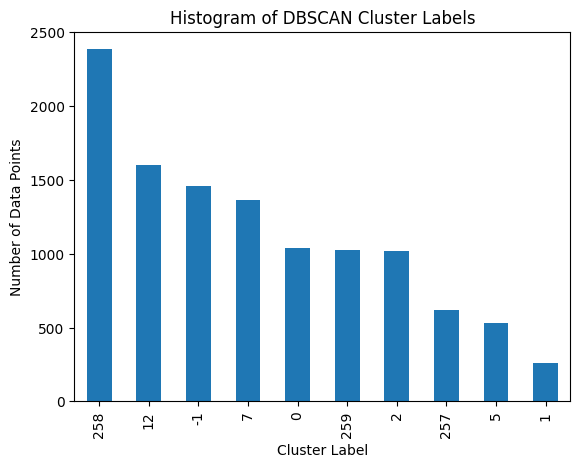

In [151]:
import matplotlib.pyplot as plt

df['cluster'].value_counts()[:10].plot(kind='bar')
plt.title('Histogram of DBSCAN Cluster Labels')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.show()


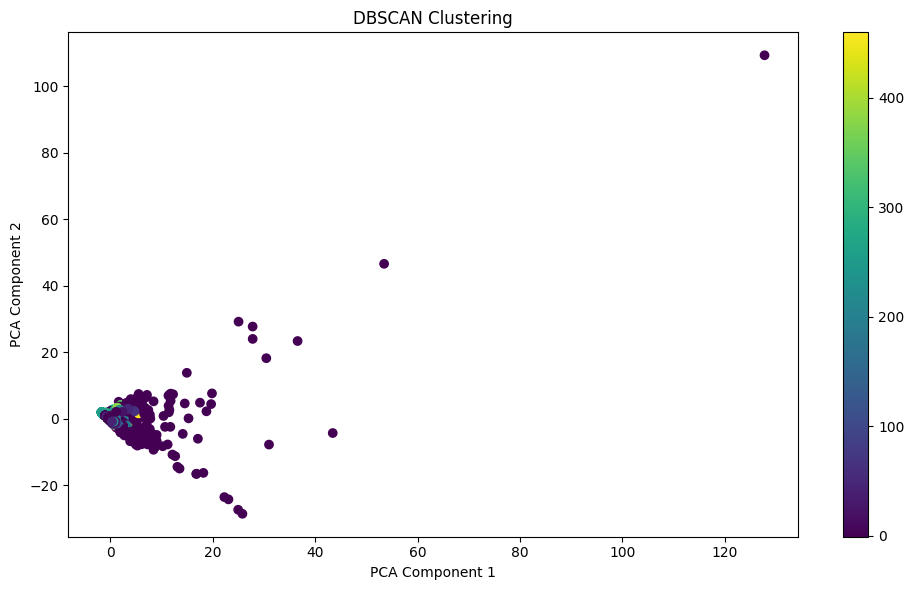

In [152]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dimensionality reduction using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['user_id', 'package_id_6400', 'package_id_Advanced', 'package_id_Basic',
       'package_id_Compensate_basic', 'package_id_Free', 'package_id_Mini',
       'package_id_NoAds', 'package_id_Pro', 'package_id_Pro plus',
       ...
       'pca_42', 'pca_43', 'pca_44', 'pca_45', 'pca_46', 'pca_47', 'pca_48',
       'pca_49', 'slient_days', 'cluster'],
      dtype='object', length=104)

In [3]:
df = pd.read_csv('clustered_data.csv')

In [5]:
df = df[['user_id', 'slient_days', 'rfm_score', 'cluster']]

In [6]:
df.head()

,user_id,slient_days,rfm_score,cluster
0,00Y2l867uJhLP91cCR0pxnSRWb42,109,0.445648,0
1,00juUkGAh2Ne3AnJPG2zAH0IeiE2,98,0.407042,1
2,01ZhIAD8CiNWEuzrPU0O3uiEZD52,102,0.523036,2
3,02rJs4mAHDfXp6BYVrpku0D0HBT2,32,0.904228,3
4,05j5VmkSFfPfYgXvbZ3NM8DatGn2,7,0.890457,4


In [7]:
df['slient_days_rev'] = 1 / df['slient_days']
df['slient_days_percentile'] = df['slient_days_rev'].rank(pct=True)

df['modified_rfm_score'] = 0.4 * df['rfm_score'] + 0.6 * df['slient_days_percentile']

In [8]:
df.drop(['rfm_score', 'slient_days_rev', 'slient_days_percentile'], axis=1, inplace=True)

In [9]:
len(set(df['cluster']))

460

In [10]:
df[df['modified_rfm_score'] > 0.8]['cluster'].value_counts().head(10)

cluster
-1     579
 12    220
 5     137
 7     109
 2      66
 35     54
 30     49
 44     48
 43     34
 61     29
Name: count, dtype: int64

In [11]:
df.shape

(16379, 4)

In [12]:
df.sort_values('modified_rfm_score', ascending=False).head(20)

,user_id,slient_days,cluster,modified_rfm_score
961,7T3qTGAruZYYePPLYXKUxEId45b2,7,-1,0.991713
3113,OjAn7Z2ApkZkvTjrU9Gsg4AE9Ho2,7,-1,0.990865
9586,Uab955cec0636b7e94bcb56d3d90c03be,7,-1,0.990409
7901,U7d4a877efde997909b49ce29edad0b68,7,-1,0.988468
4850,U1ffeb2d0f6025d7ec60f175e7194836f,7,-1,0.987384
4308,U103a1262b30e54aa26c68ffb0abdbd54,7,-1,0.986602
5872,U3f5dd6f5b869bb9d2119a21ad9442508,7,-1,0.985353
14053,hgOxd5XXsicqBUMa4YEIqjSV2Yx1,7,-1,0.984799
2849,MUFXAJctuYRgD4UKhauV3TkDvjM2,7,-1,0.984784
1029,7zeQY5td6tQcYnBmSvVSW996HFh1,7,-1,0.984200


In [13]:
df_msg = pd.read_csv('message.csv')
df_pay = pd.read_csv('payment.csv')

C:\Users\iHC\AppData\Local\Temp\ipykernel_41524\2426253510.py:1: DtypeWarning: Columns (7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_msg = pd.read_csv('message.csv')
C:\Users\iHC\AppData\Local\Temp\ipykernel_41524\2426253510.py:2: DtypeWarning: Columns (8,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pay = pd.read_csv('payment.csv')


In [14]:
from IPython.display import display, Markdown

def get_cluster_data(cluster_id):
    user_ids = df[df['cluster'] == cluster_id]['user_id']
    df_msg_cluster = df_msg[df_msg['user_id'].isin(user_ids)]
    df_pay_cluster = df_pay[df_pay['user_id'].isin(user_ids)]

    display(Markdown(f'# **Cluster {cluster_id}**'))
    display(Markdown('#### Message Data'))
    display(df_msg_cluster.sort_values('datetime', ascending=False).head(3))
    display(Markdown('#### Payment Data'))
    display(df_pay_cluster.head(10))
    display(Markdown('#### Package ID Distribution'))
    display(df_pay_cluster['package_id'].value_counts())

In [15]:
len(set(df['cluster']))

460

In [16]:
df['cluster'].value_counts()

cluster
 258    2372
 12     1603
-1      1484
 7      1362
 0      1041
        ... 
 275       2
 278       2
 281       2
 285       2
 458       2
Name: count, Length: 460, dtype: int64

In [17]:
get_cluster_data(-1) # 12, 44

# **Cluster -1**

#### Message Data

,_id,user_id,message,datetime,channel,count,speaker,url,audio_id,page,provider,language
4798441,666fd26f5e45d4b34c56547e,U3cd79937f3808878dc9d124f3befe16d,邀请号码A600,2024-06-17 13:06:39.074438,play,8.0,zh_jidapaamarangkul,NaN,XDAAR,studio,NaN,NaN
4798435,666fd2666eb8d341e57d6157,U3cd79937f3808878dc9d124f3befe16d,邀请号码A599,2024-06-17 13:06:30.593255,play,8.0,zh_jidapaamarangkul,NaN,VZKCJ,studio,NaN,NaN
4798432,666fd25f5e45d4b34c56547d,U3cd79937f3808878dc9d124f3befe16d,邀请号码A598,2024-06-17 13:06:23.279366,play,8.0,zh_jidapaamarangkul,NaN,DWGAZ,studio,NaN,NaN


#### Payment Data

,_id,user_id,package_id,price,qrcode,transactionid,datetime,ref1,status,point,promotion,actual_time,sale_code_name,package_sub,action,subscription,sub_id
2,613afeffbd6b51f5666f4dca,U3bdae9df091601f970a61ff8e5d5a72a,150,50.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521091013...,2021-09-10,CW2AEP6Q2EMW3S45KFSN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,613f2949233bb14db8f57c60,U3bdae9df091601f970a61ff8e5d5a72a,credits,1.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521091317...,2021-09-13,0QEZB1JQBB5EY5W0CRFU,False,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,613f2adcfef29652afa16919,U3bdae9df091601f970a61ff8e5d5a72a,credits,1.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521091317...,2021-09-13,BD32I7WI0VDQGEUA2I7K,False,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
14,6144884f14937685bf43ca1a,U3bdae9df091601f970a61ff8e5d5a72a,credits,3.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521091719...,2021-09-17,JYGDVAUNPIU63K51WHJ6,False,195.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15,614488be5138bdd3ef565f3d,U3bdae9df091601f970a61ff8e5d5a72a,credits,1.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521091719...,2021-09-17,F32MNVCXUZ05CTX90CDR,False,96.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
39,614e93487e08c711bcc763b6,U1740a6cc6586f82f07b8a7414581c1da,credits,1.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521092510...,2021-09-25,8RAO5CTS5OQJE7L2SVWN,False,13.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
40,614f0224487220b1bc8ef039,U3bdae9df091601f970a61ff8e5d5a72a,credits,1.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521092518...,2021-09-25,94ILSKL0HI9GY9SMHC9C,True,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
42,61512e117e08c711bcc763b8,U3bdae9df091601f970a61ff8e5d5a72a,credits,3.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521092709...,2021-09-27,COFKGC7AVYNGC8WA7EEF,False,165.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
52,6155df40487220b1bc8ef052,U1740a6cc6586f82f07b8a7414581c1da,credits,1.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521093023...,2021-09-30,IW0TKYJUYTZFJU4QTHCV,False,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
54,6158a184b510193fbe78830b,U4d16b2e3ae993030bd3ff70a586f4955,credits,1.0,00020101021230820016A0000006770101120115010753...,0107536000374040000022030012434300012521100301...,2021-10-03,486MM6ED051JFB2Y22D5,False,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Package ID Distribution

package_id
credits             14793
package_100          2836
package_50           1683
credit               1660
pack_299              833
package_200           659
pack_99               593
Basic                 242
package_400           241
Mini                  180
pack_750              136
NoAds                 134
mini                  100
package_800            96
package_500            90
pack_499               71
Advanced               67
pack_599               61
package_300            51
6                      45
pack_2000              33
package_1000           32
pack_600               31
pack_179               24
pack_1299              24
package_1600           21
pack_1699              19
3                      16
package_3200           14
Unlimited              11
1                      10
Pro                    10
pack_1099               9
package_6400            8
Free                    8
pack_5000               5
pack_10000              3
pack_20000              3
1

In [18]:
rankings_df = df.sort_values('modified_rfm_score', ascending=False)

In [19]:
rankings_df.drop('slient_days', axis=1, inplace=True)

In [20]:
rankings_df = rankings_df[rankings_df['modified_rfm_score'] > 0.70]

In [21]:
rankings_df.shape

(4448, 3)

In [22]:
rankings_df.value_counts('cluster').head(20)

cluster
-1     813
 12    629
 7     410
 5     308
 2     256
 0     190
 35    102
 30     87
 44     81
 39     60
 61     56
 43     48
 32     45
 13     41
 11     40
 20     35
 1      32
 6      28
 16     28
 27     27
Name: count, dtype: int64

In [23]:
df_pay['package_id'].str.startswith('package_')

0         False
1         False
2         False
3         False
4         False
          ...  
547993    False
547994    False
547995    False
547996    False
547997    False
Name: package_id, Length: 547998, dtype: object

In [24]:
inspected_clusters = [-1, 12, 5, 7, 44, 35, 0, 2, 30, 39]

# filter_payments = df_pay.dropna(subset=['package_id'])
# filter_payments = filter_payments[filter_payments['package_id'].str.startswith('package_')]
# filter_payments = filter_payments[filter_payments['package_id'].str[len('package_'):].astype(int) >= 499]

filter_payments = df_pay.dropna(subset=['price'])
filter_payments = filter_payments[filter_payments['price'] >= 199]

filter_uids = filter_payments['user_id'].unique()

results = []

for cluster_id in inspected_clusters:
    tmp_df = rankings_df[rankings_df['cluster'] == cluster_id].sort_values('modified_rfm_score', ascending=False)
    tmp_df = tmp_df[tmp_df['user_id'].isin(filter_uids)]

    for _, row in tmp_df.iterrows():
        results.append([cluster_id, row['user_id'], row['modified_rfm_score']])
    print(f'Cluster {cluster_id} done!')

results_df = pd.DataFrame(results, columns=['cluster', 'user_id', 'modified_rfm_score'])

Cluster -1 done!
Cluster 12 done!
Cluster 5 done!
Cluster 7 done!
Cluster 44 done!
Cluster 35 done!
Cluster 0 done!
Cluster 2 done!
Cluster 30 done!
Cluster 39 done!


In [25]:
print(results_df.shape)
results_df.head()

(1625, 3)


,cluster,user_id,modified_rfm_score
0,-1,OjAn7Z2ApkZkvTjrU9Gsg4AE9Ho2,0.990865
1,-1,Uab955cec0636b7e94bcb56d3d90c03be,0.990409
2,-1,U7d4a877efde997909b49ce29edad0b68,0.988468
3,-1,U1ffeb2d0f6025d7ec60f175e7194836f,0.987384
4,-1,U103a1262b30e54aa26c68ffb0abdbd54,0.986602


In [26]:
results_df = results_df.sort_values('modified_rfm_score', ascending=False)

In [30]:
results_df

,cluster,user_id,modified_rfm_score
0,-1,OjAn7Z2ApkZkvTjrU9Gsg4AE9Ho2,0.991640
1,-1,Uab955cec0636b7e94bcb56d3d90c03be,0.990137
2,-1,U7d4a877efde997909b49ce29edad0b68,0.989875
3,-1,U1ffeb2d0f6025d7ec60f175e7194836f,0.989046
4,-1,U103a1262b30e54aa26c68ffb0abdbd54,0.987907
...,...,...,...
1745,-1,sIrRycuWuRdPEwnwEDaWg6klXDi1,0.700575
1746,12,U6096f23edfc82b143126adae7b2c5aa4,0.700482
1747,12,Uth9ufeYu5ZtTYMtC3HkR9gH4303,0.700231
1748,-1,6C3ovHnQvvazAdtV8DChZlkWnk33,0.700215


In [391]:
results_df.to_csv('results.csv', index=False)

In [28]:
results_df = pd.read_csv('results.csv')

In [29]:
results_df.value_counts('cluster')

cluster
 12    690
-1     541
 5     346
 44     84
 39     72
 2       8
 0       4
 7       2
 30      2
 35      1
Name: count, dtype: int64

In [31]:
results_df

,cluster,user_id,modified_rfm_score
0,-1,OjAn7Z2ApkZkvTjrU9Gsg4AE9Ho2,0.991640
1,-1,Uab955cec0636b7e94bcb56d3d90c03be,0.990137
2,-1,U7d4a877efde997909b49ce29edad0b68,0.989875
3,-1,U1ffeb2d0f6025d7ec60f175e7194836f,0.989046
4,-1,U103a1262b30e54aa26c68ffb0abdbd54,0.987907
...,...,...,...
1745,-1,sIrRycuWuRdPEwnwEDaWg6klXDi1,0.700575
1746,12,U6096f23edfc82b143126adae7b2c5aa4,0.700482
1747,12,Uth9ufeYu5ZtTYMtC3HkR9gH4303,0.700231
1748,-1,6C3ovHnQvvazAdtV8DChZlkWnk33,0.700215


In [33]:
df2 = pd.read_csv('scores.csv')

In [39]:
df2.head()

,user_id,Score
0,Ub5111fac4f22efc1d5c1c5ab076d2e4f,0.606771
1,U589cb5e17266860d01a7cf3c7d94d603,0.606494
2,U876a1959e5138168366c3e91c5eeaf2f,0.603416
3,U50698de5f77219c250cac375c56cceb2,0.601634
4,U0a63b5746c7435d307a4e973e58fba55,0.601903


In [37]:
df2.rename(columns={'_id': 'user_id'}, inplace=True)

In [38]:
len(set(results_df['user_id']) & set(df2['user_id']))

162

In [40]:
merged_df = pd.merge(results_df, df2, on='user_id', how='inner')

In [42]:
merged_df.head()

,cluster,user_id,modified_rfm_score,Score
0,-1,Uaf31defcf13d974762f0c36694dcb2c4,0.978704,0.167994
1,-1,U45633c4534c6a358ddabade336ec65c0,0.969762,0.175095
2,-1,U3cd79937f3808878dc9d124f3befe16d,0.969102,0.236937
3,-1,U87cb495868a610f9ae5cd52f4728e81c,0.966725,0.155378
4,-1,U27974a7a5042851388b9124f14ab80d2,0.962600,0.149884


In [43]:
stat_df = merged_df['modified_rfm_score'].describe(percentiles=[0.25, 0.5, 0.75])
stat_df2 = merged_df['Score'].describe(percentiles=[0.25, 0.5, 0.75])

stat_df, stat_df2

(count    162.000000
 mean       0.823422
 std        0.069363
 min        0.700482
 25%        0.773777
 50%        0.821504
 75%        0.867397
 max        0.978704
 Name: modified_rfm_score, dtype: float64,
 count    162.000000
 mean       0.109868
 std        0.112631
 min        0.011600
 25%        0.031947
 50%        0.069940
 75%        0.150771
 max        0.605909
 Name: Score, dtype: float64)

Summary statistics for modified_rfm_score:
 count    162.000000
mean       0.823422
std        0.069363
min        0.700482
25%        0.773777
50%        0.821504
75%        0.867397
max        0.978704
Name: modified_rfm_score, dtype: float64

Summary statistics for score:
 count    162.000000
mean       0.109868
std        0.112631
min        0.011600
25%        0.031947
50%        0.069940
75%        0.150771
max        0.605909
Name: Score, dtype: float64


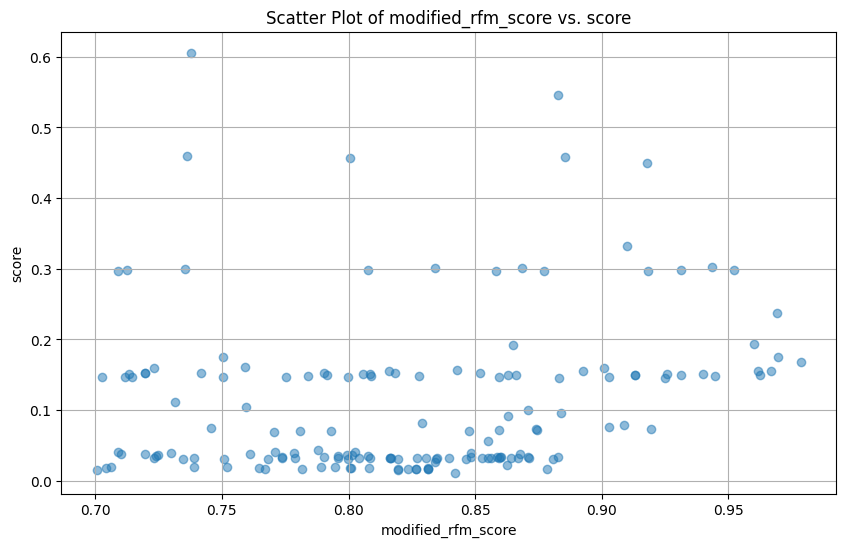


Correlation Coefficient between modified_rfm_score and score: 0.19626336698006092


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame

# Summary statistics for df['modified_rfm_score']
stat_df = merged_df['modified_rfm_score'].describe(percentiles=[0.25, 0.5, 0.75])

# Summary statistics for df2['score']
stat_df2 = merged_df['Score'].describe(percentiles=[0.25, 0.5, 0.75])

# Display summary statistics
print("Summary statistics for modified_rfm_score:\n", stat_df)
print("\nSummary statistics for score:\n", stat_df2)

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['modified_rfm_score'], merged_df['Score'], alpha=0.5)
plt.title('Scatter Plot of modified_rfm_score vs. score')
plt.xlabel('modified_rfm_score')
plt.ylabel('score')
plt.grid(True)
plt.show()

# Correlation Coefficient
correlation = merged_df['modified_rfm_score'].corr(merged_df['Score'])
print("\nCorrelation Coefficient between modified_rfm_score and score:", correlation)


In [401]:
df3 = pd.read_csv('target_id.csv')

In [409]:
df3.shape

(24788, 1)

In [411]:
df.shape

(16379, 4)

In [410]:
df['user_id'].isin(df3['_id']).sum()

9523